<a href="https://colab.research.google.com/github/RANJEETH-RIKKALA/FINANCIAL_ENGINEERING_WITH_AI/blob/DEV_RIKKALA_1.28.2026/Financial_Engineering_with_AI_Getting_Started.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTS

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# WARM UP Exercises

## 10000 Samples of Normal Distribution

In [ ]:
samples = np.random.normal(loc=0.0,scale=1.0,size=1000)
samples[:5]

array([-1.5867772 ,  2.24664202,  0.98243997, -0.38470617,  0.51266751])

### Time Series Plot of Samples

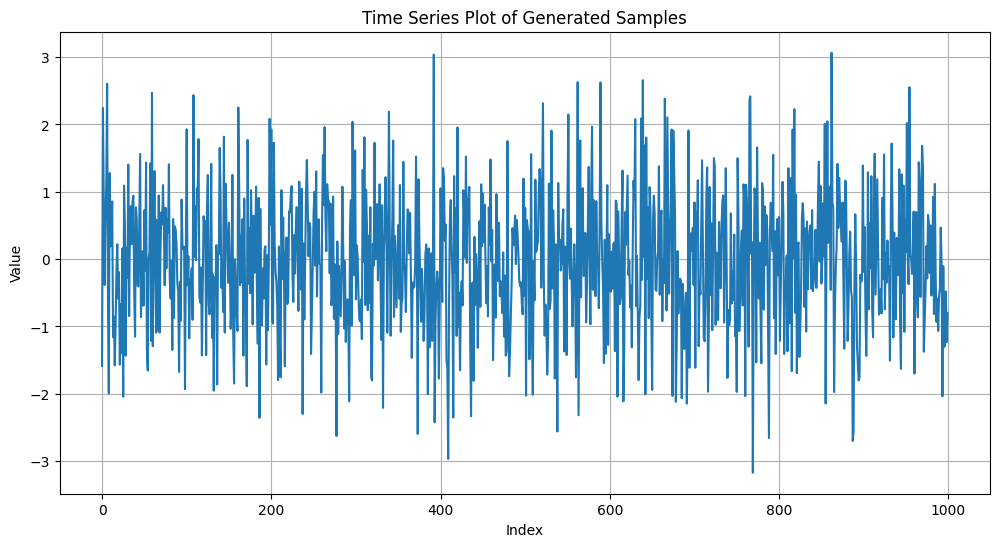

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(samples)
plt.title('Time Series Plot of Generated Samples')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)
plt.show()

### Histogram Plot of Samples

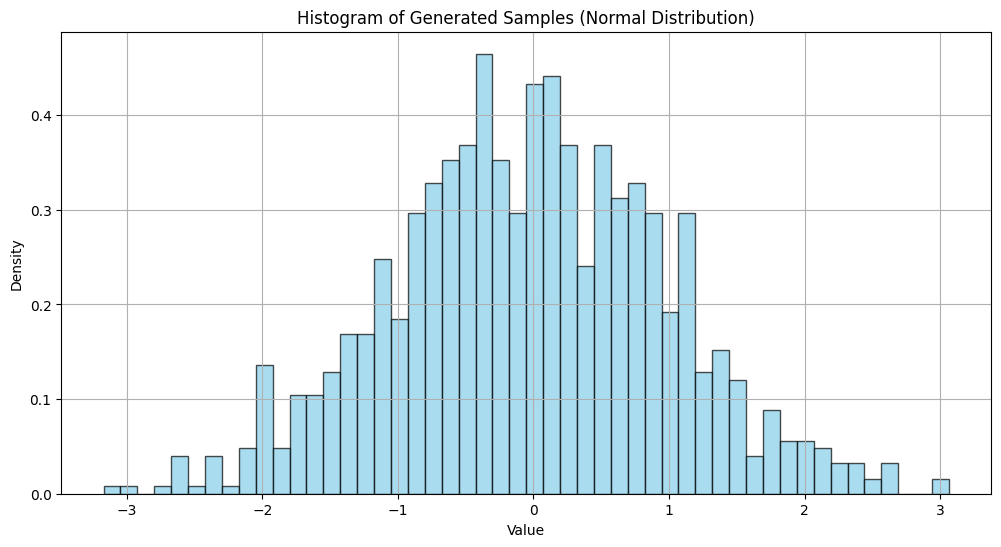

In [ ]:
plt.figure(figsize=(12, 6))
plt.hist(samples, bins=50, density=True, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Histogram of Generated Samples (Normal Distribution)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True)
plt.show()

### Scatter Plot with a Trend Line

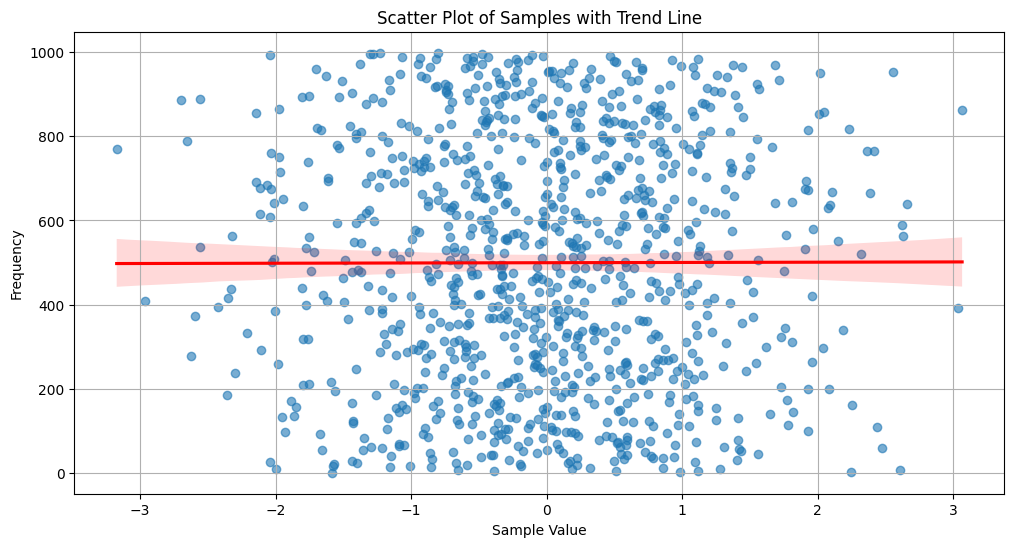

In [ ]:
plt.figure(figsize=(12, 6))
sns.regplot(y=np.arange(len(samples)), x=samples, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Scatter Plot of Samples with Trend Line')
plt.xlabel('Sample Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Cumulative Sum of Samples & Time Series Plot

In [ ]:
cumulative_sum = np.cumsum(samples)
display(cumulative_sum[:5])

array([-1.5867772 ,  0.65986482,  1.64230479,  1.25759862,  1.77026613])

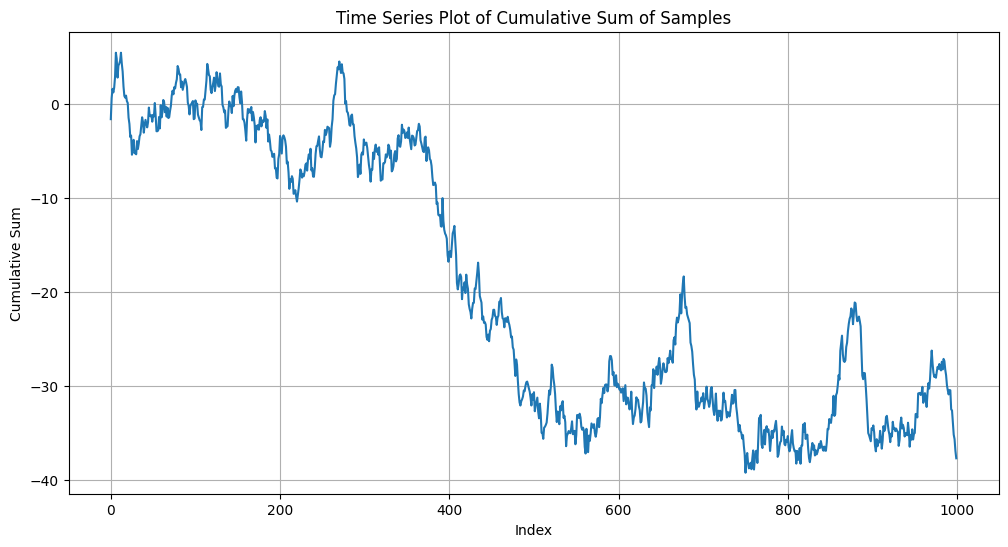

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(cumulative_sum)
plt.title('Time Series Plot of Cumulative Sum of Samples')
plt.xlabel('Index')
plt.ylabel('Cumulative Sum')
plt.grid(True)
plt.show()

## 1000 Samples from multivariate normal

In [ ]:
mean = [0, 0]
cov = [[1, -0.5], [-0.5, 2]]  # 2x2 covariance matrix
multivariate_samples = np.random.multivariate_normal(mean, cov, 1000)

display(multivariate_samples[:5])

array([[ 1.46682489, -0.3163148 ],
       [-0.7209382 , -1.30986736],
       [ 0.4669665 , -0.51847002],
       [-0.66240691, -3.39302834],
       [-0.04106864,  0.63027977]])

### Scatterplot of Multi Variate Samples

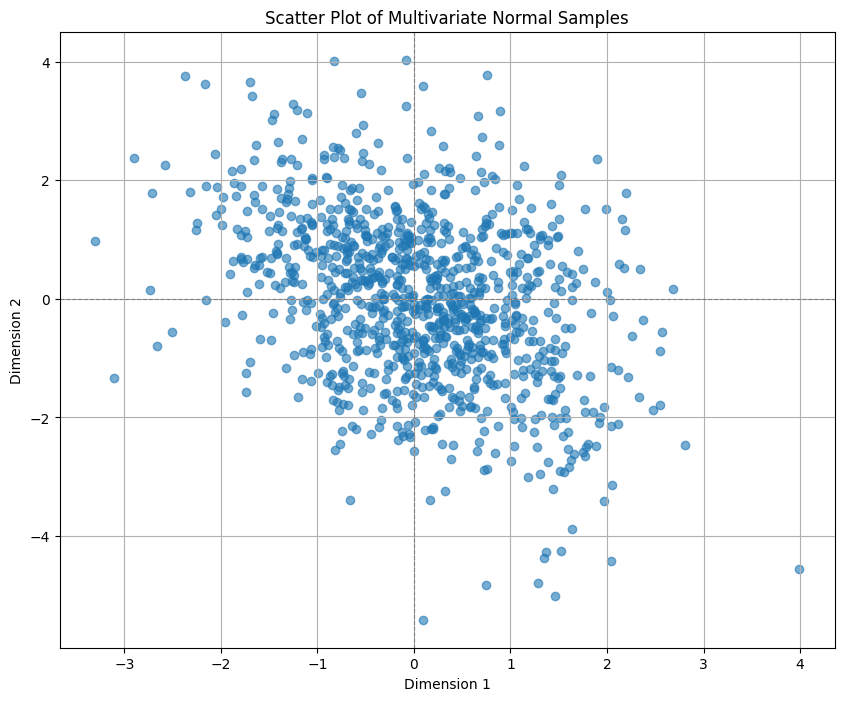

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(multivariate_samples[:, 0], multivariate_samples[:, 1], alpha=0.6)
plt.title('Scatter Plot of Multivariate Normal Samples')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.show()

### Mean

In [ ]:
mean_multivariate = sum(multivariate_samples)/len(multivariate_samples)
display(mean_multivariate)


array([ 0.05261679, -0.01678424])

### Co Varaince

In [ ]:
import numpy as np

# Extract dimensions
dim1 = multivariate_samples[:, 0]
dim2 = multivariate_samples[:, 1]

# Calculate means
mean_dim1 = sum(dim1) / len(dim1)
mean_dim2 = sum(dim2) / len(dim2)

# Calculate deviations from the mean
dev_dim1 = dim1 - mean_dim1
dev_dim2 = dim2 - mean_dim2

# Number of samples
n = len(multivariate_samples)

# Calculate covariance matrix elements (using n-1 for sample covariance)
cov11 = sum(dev_dim1 * dev_dim1) / (n - 1)
cov12 = sum(dev_dim1 * dev_dim2) / (n - 1)
cov21 = sum(dev_dim2 * dev_dim1) / (n - 1) # Should be same as cov12
cov22 = sum(dev_dim2 * dev_dim2) / (n - 1)

# Construct the covariance matrix
covariance_matrix_manual = np.array([[cov11, cov12], [cov21, cov22]])

print("Manually calculated covariance matrix:")
display(covariance_matrix_manual)

Manually calculated covariance matrix:


array([[ 1.01537694, -0.53007309],
       [-0.53007309,  1.96556727]])

## Getting Setup

In [ ]:
# Testing the file download
!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

--2026-01-28 16:52:25--  https://lazyprogrammer.me/course_files/airline_passengers.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2036 (2.0K) [text/csv]
Saving to: ‘airline_passengers.csv’

airline_passengers. 100%[===================>]   1.99K  --.-KB/s    in 0s      

2026-01-28 16:52:25 (45.8 MB/s) - ‘airline_passengers.csv’ saved [2036/2036]



In [ ]:
# Accessing the downloaded file
df_airlines = pd.read_csv('airline_passengers.csv', index_col='Month',parse_dates=True)
df_airlines

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


## Getting Yahoo Finance Data

In [25]:
import  yfinance as yf
import os